In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Data Preprocessing

In [2]:
df = pd.read_csv('diabetesPrediction.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.shape
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [6]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [10]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Data Visualization

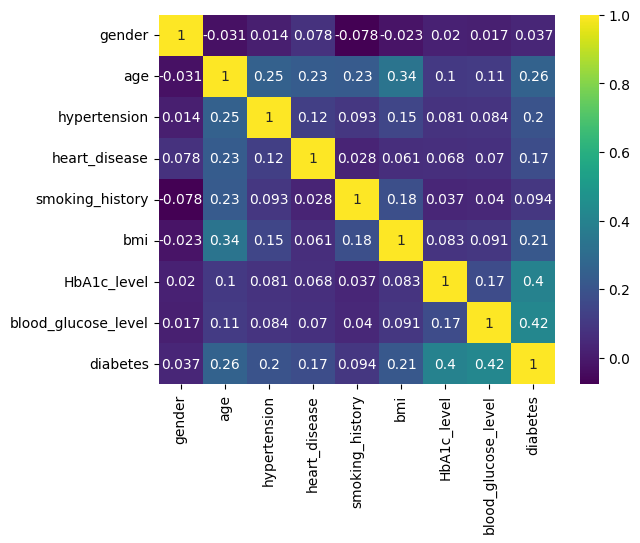

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

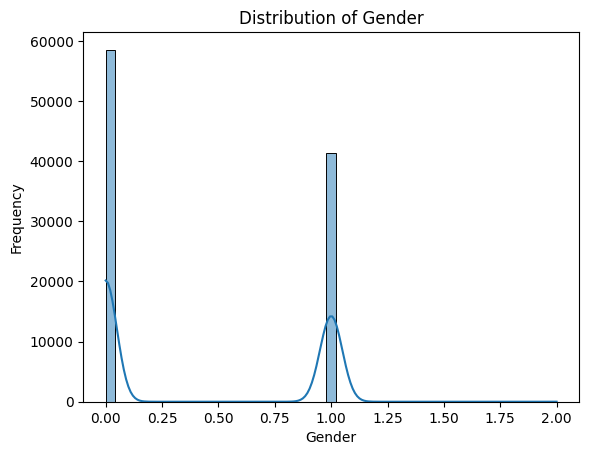

In [12]:
sns.histplot(df['gender'], kde=True)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

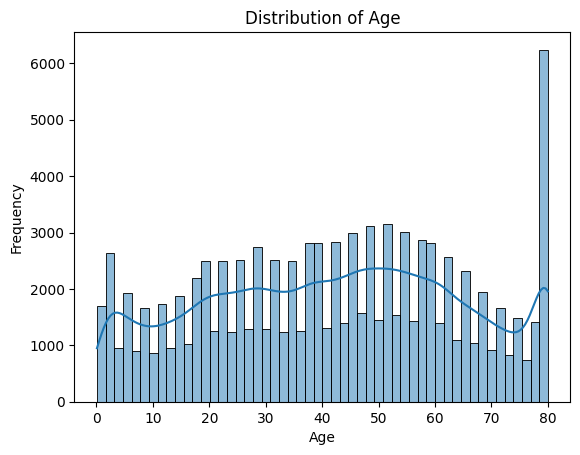

In [13]:
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

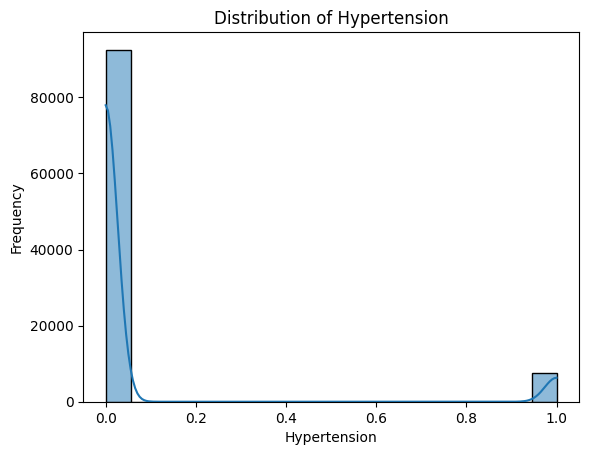

In [14]:
sns.histplot(df['hypertension'], kde=True)
plt.title("Distribution of Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Frequency")
plt.show()

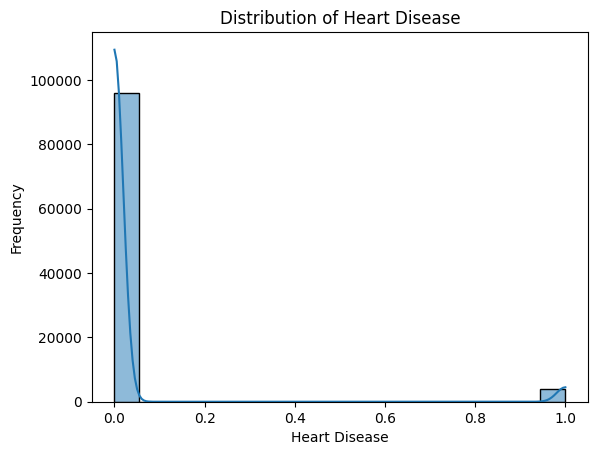

In [15]:
sns.histplot(df['heart_disease'], kde=True)
plt.title("Distribution of Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.show()

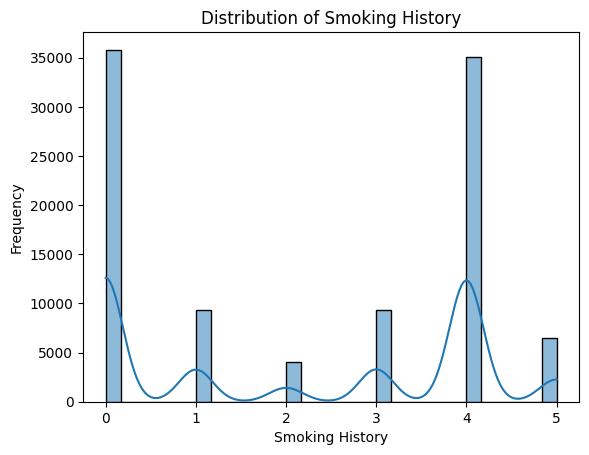

In [16]:
sns.histplot(df['smoking_history'], kde=True)
plt.title("Distribution of Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Frequency")
plt.show()

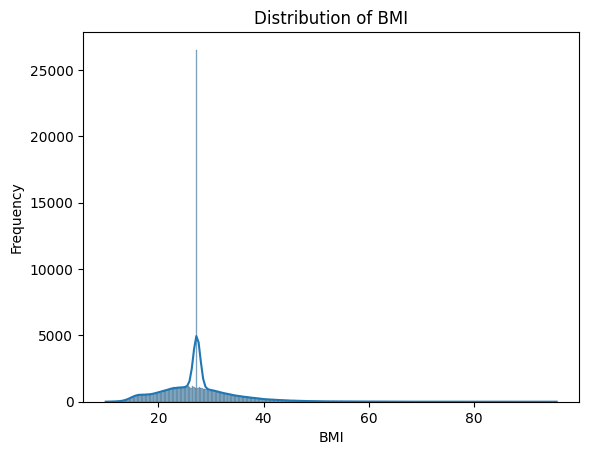

In [17]:
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

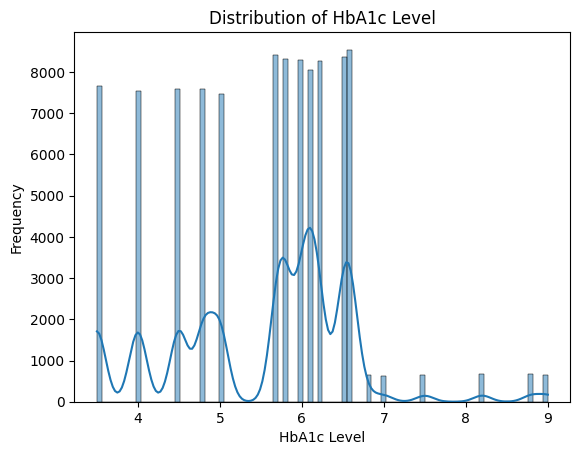

In [18]:
sns.histplot(df['HbA1c_level'], kde=True)
plt.title("Distribution of HbA1c Level")
plt.xlabel("HbA1c Level")
plt.ylabel("Frequency")
plt.show()

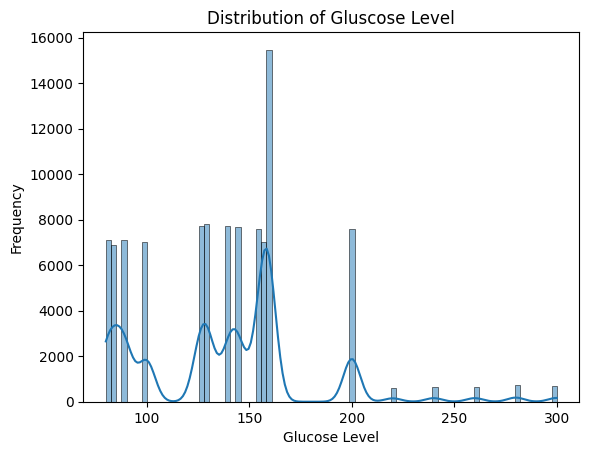

In [19]:
sns.histplot(df['blood_glucose_level'], kde=True)
plt.title("Distribution of Gluscose Level")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.show()

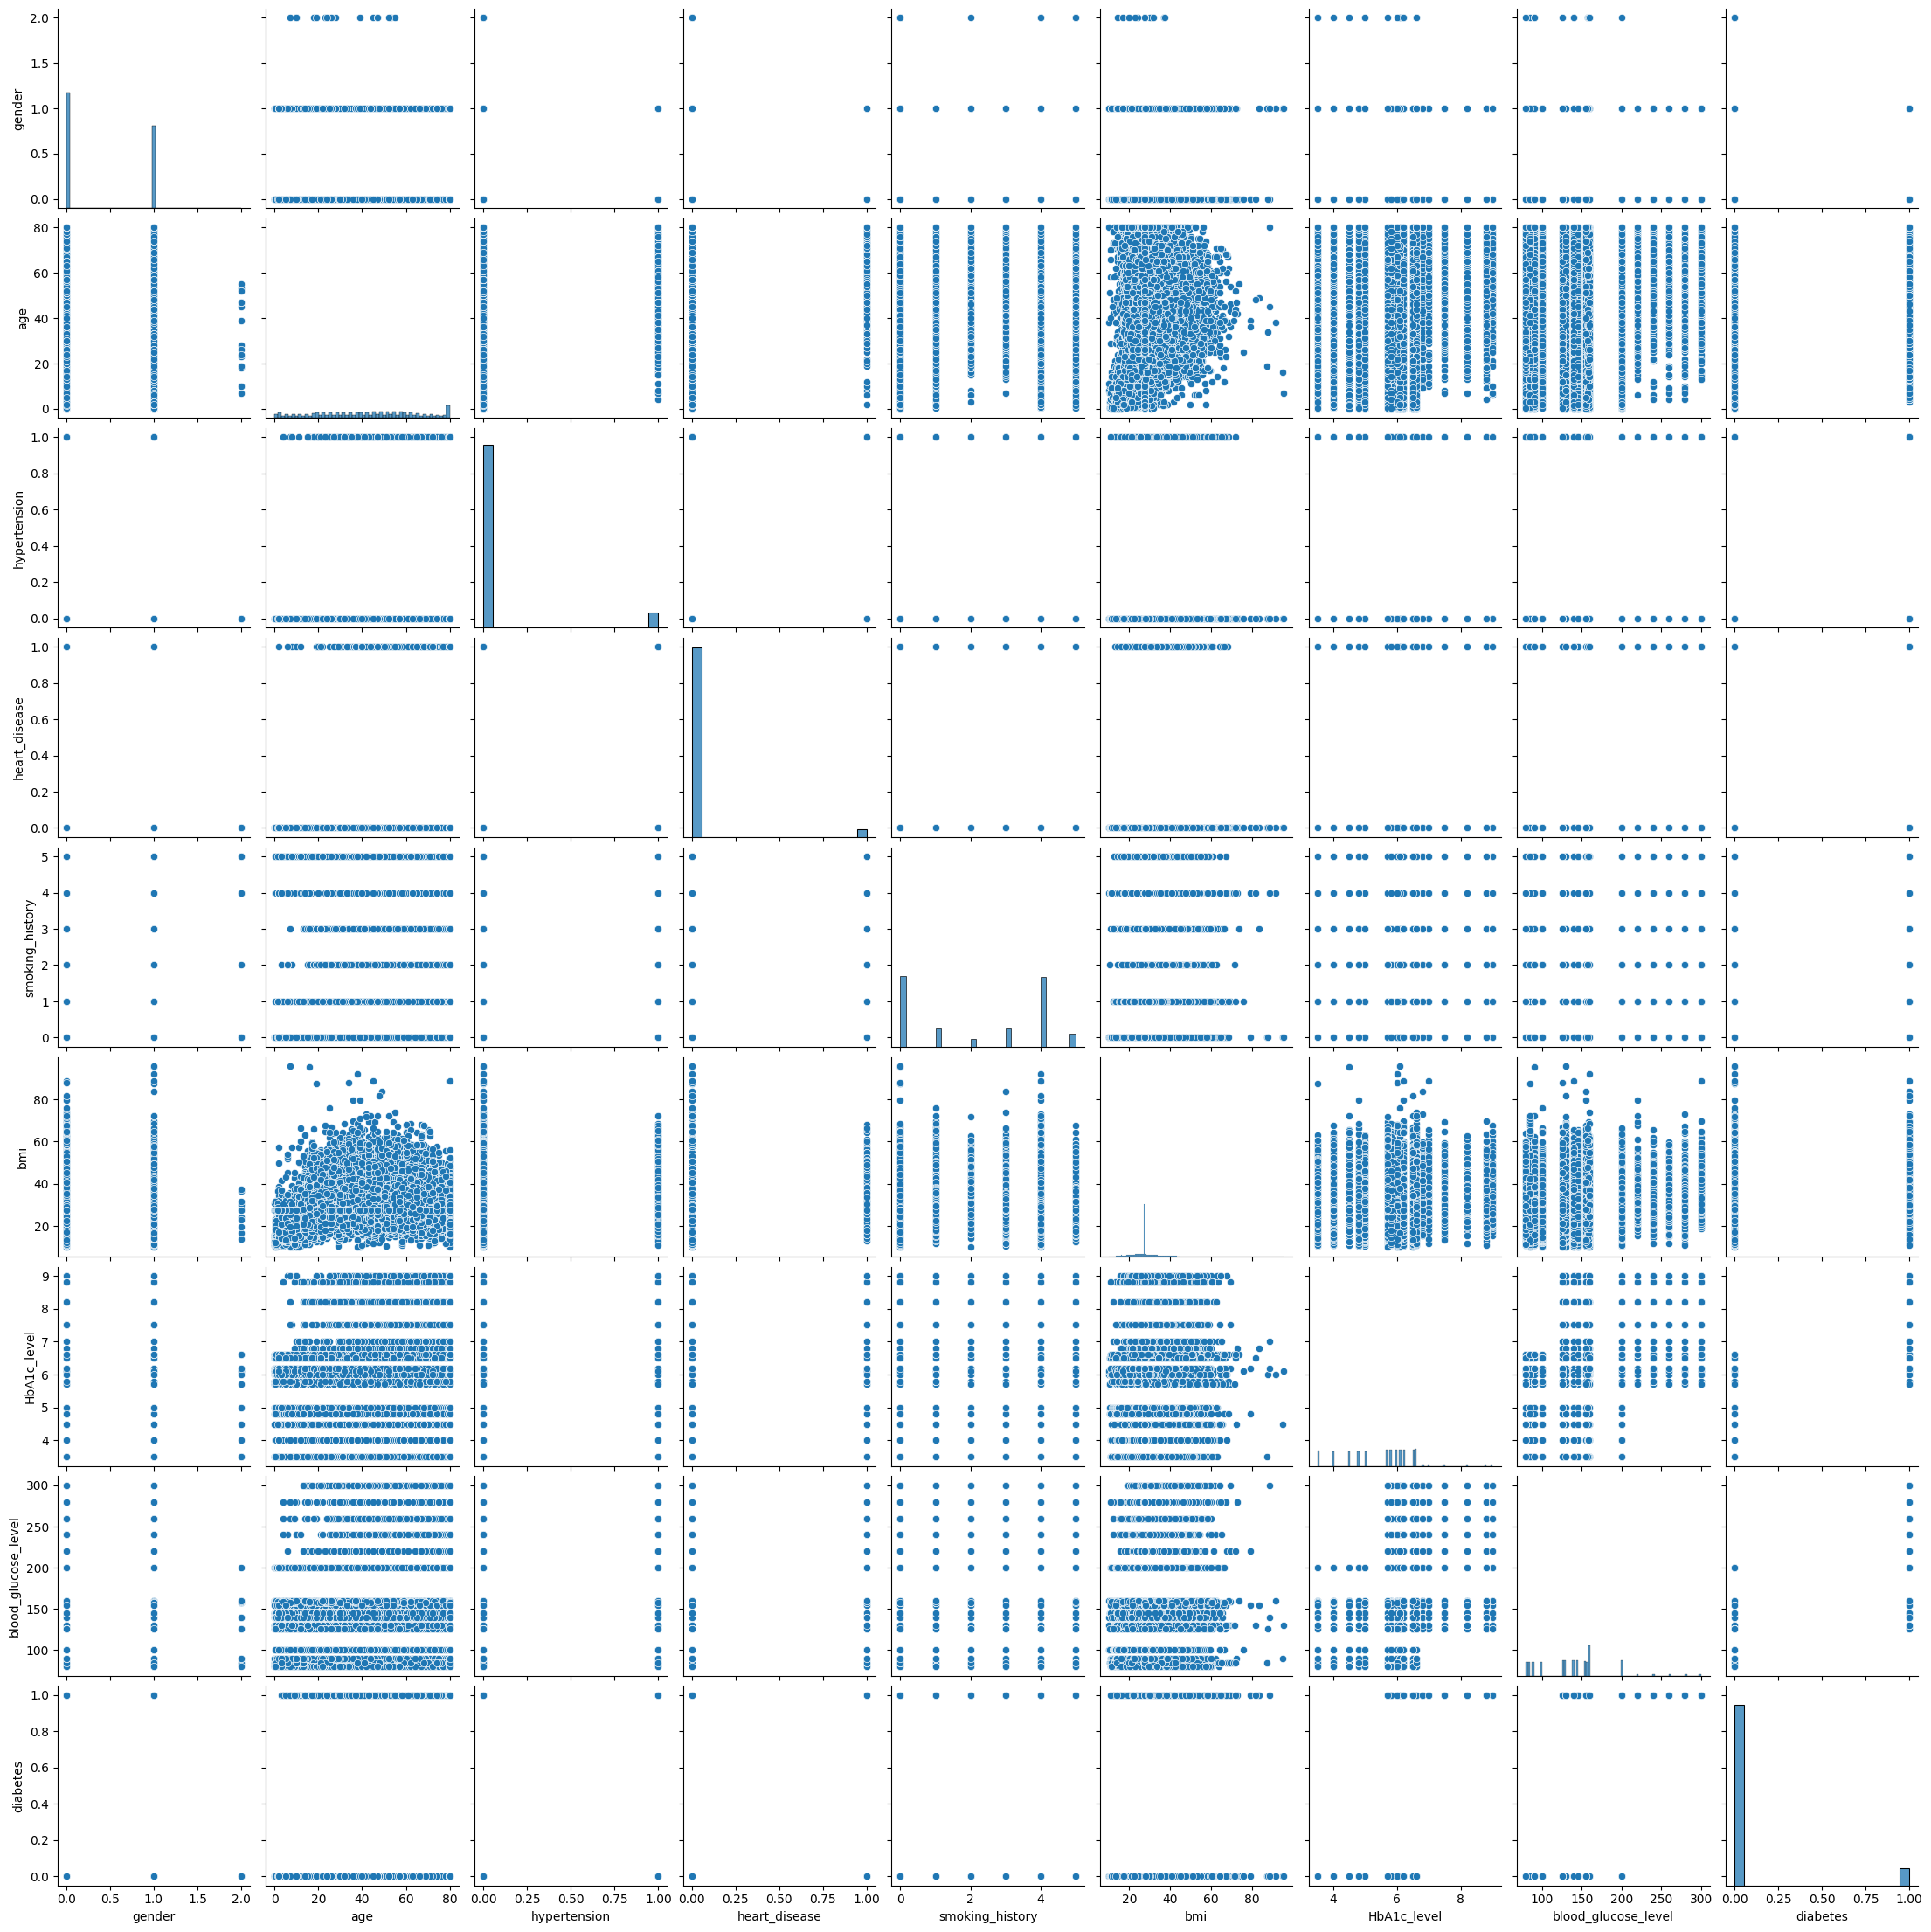

In [20]:
sns.pairplot(df)
plt.show()

Algorithm Implementation

In [21]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Logistic Regression Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy:  95.73 %
Precision: 85.59794256322331%
Recall: 59.27574948055803%
F1-Score: 70.04559803577692%

Confusion Matrix:
[[36295   336]
 [ 1372  1997]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36631
           1       0.86      0.59      0.70      3369

    accuracy                           0.96     40000
   macro avg       0.91      0.79      0.84     40000
weighted avg       0.95      0.96      0.95     40000



c:\Users\cyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Decision Tree Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy:  95.36666666666666 %
Precision: 72.31006556112611%
Recall: 73.61601884570082%
F1-Score: 72.95719844357976%

Confusion Matrix:
[[26735   718]
 [  672  1875]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.72      0.74      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.86      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [23]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

r_model = RandomForestClassifier()

r_model.fit(X_train, y_train)
y_pred = r_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Random Forest Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy:  97.09 %
Precision: 94.9685534591195%
Recall: 69.98841251448435%
F1-Score: 80.58705803869246%

Confusion Matrix:
[[9105   32]
 [ 259  604]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9137
           1       0.95      0.70      0.81       863

    accuracy                           0.97     10000
   macro avg       0.96      0.85      0.90     10000
weighted avg       0.97      0.97      0.97     10000



In [24]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Gaussian NB Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Gaussian NB Accuracy:  90.6425 %
Precision: 46.03477523324852%
Recall: 64.44048679133275%
F1-Score: 53.704390847247986%

Confusion Matrix:
[[34086  2545]
 [ 1198  2171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     36631
           1       0.46      0.64      0.54      3369

    accuracy                           0.91     40000
   macro avg       0.71      0.79      0.74     40000
weighted avg       0.92      0.91      0.91     40000



In [25]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

lda_model = LinearDiscriminantAnalysis()

lda_model.fit(X_train, y_train)
y_pred = lda_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Linear Discriminant Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Linear Discriminant Accuracy:  95.6875 %
Precision: 86.02103418054338%
Recall: 58.26654793707332%
F1-Score: 69.47442930454787%

Confusion Matrix:
[[36312   319]
 [ 1406  1963]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36631
           1       0.86      0.58      0.69      3369

    accuracy                           0.96     40000
   macro avg       0.91      0.79      0.84     40000
weighted avg       0.95      0.96      0.95     40000



In [26]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svc_model = SVC()

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Support Vector Classifier Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Support Vector Classifier Accuracy:  94.78999999999999 %
Precision: 100.0%
Recall: 39.62920046349942%
F1-Score: 56.76348547717842%

Confusion Matrix:
[[9137    0]
 [ 521  342]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      9137
           1       1.00      0.40      0.57       863

    accuracy                           0.95     10000
   macro avg       0.97      0.70      0.77     10000
weighted avg       0.95      0.95      0.94     10000



In [27]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

svc_model = KNeighborsClassifier()

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("K-Neighbors Accuracy: ", accuracy, "%")

precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

K-Neighbors Accuracy:  95.49 %
Precision: 88.43283582089553%
Recall: 54.92468134414832%
F1-Score: 67.7626876340243%

Confusion Matrix:
[[9075   62]
 [ 389  474]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9137
           1       0.88      0.55      0.68       863

    accuracy                           0.95     10000
   macro avg       0.92      0.77      0.83     10000
weighted avg       0.95      0.95      0.95     10000



In [28]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

test_size = 0.3  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "SVC": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=3)
}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1-Score: {f1:.2f}%")

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Evaluating Logistic Regression...
Accuracy: 95.89%
Precision: 86.35%
Recall: 61.33%
F1-Score: 71.72%

Confusion Matrix:
[[27206   247]
 [  985  1562]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.86      0.61      0.72      2547

    accuracy                           0.96     30000
   macro avg       0.91      0.80      0.85     30000
weighted avg       0.96      0.96      0.96     30000


Evaluating Decision Tree...
Accuracy: 95.24%
Precision: 71.41%
Recall: 73.26%
F1-Score: 72.33%

Confusion Matrix:
[[26706   747]
 [  681  1866]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.71      0.73      0.72      2547

    accuracy                           0.95     30000
   macro avg       0.84      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



In [29]:
import pandas as pd
from sklearn.utils import resample
import joblib

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

smoking_history_mapping = {'No Info': 0, 'current': 1, 'not current': 2, 'former': 3, 'never': 4}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

df.fillna(df.mean(), inplace=True)

majority_class = df[df['diabetes'] == 0]
minority_class = df[df['diabetes'] == 1]

minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

df_balanced = pd.concat([majority_class, minority_class_upsampled])

X = df_balanced.drop('diabetes', axis=1)
y = df_balanced['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_scaled, y_train)

joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


c:\Users\cyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\cyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\cyash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


['scaler.pkl']